<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/Logo.png?alt=media&token=06318ee3-d7a0-44a0-97ae-2c95f110e3ac" width="100" height="100" align="right"/>

## 6 Recurrent Neural Networks in TensorFlow - Exercise LSTM

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/6RNN17.png?alt=media&token=cc9fd94a-42c2-4ee5-a325-3200680f5f56" width="500" align="center"/>


## Built-in LSTM Layers

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/1Keras.png?alt=media&token=9f4add09-14d3-49ed-bc11-f0497f6e96f1" width="200" height="200" align="right"/>

<font size="3">**There are three built-in RNN layers in Keras:**</font>

> <font size="3">**<span style="background-color: #ECECEC; color:#0047bb">keras.layers.RNN</span>**</font>

> <font size="3">**<span style="background-color: #ECECEC; color:#0047bb">keras.layers.LSTM</span>**</font> 

> <font size="3">**<span style="background-color: #ECECEC; color:#0047bb">keras.layers.GRU</span>, a variant on LSTM**</font>   

Reference:<br>
https://arxiv.org/abs/1406.1078 <br>
https://www.bioinf.jku.at/publications/older/2604.pdf

### <font color='#176BEF'> Examples </font>
<hr style="border:2px solid #E1F6FF"> </hr>

### <font color='#34A853'>Import libraries</font>
<hr style="border:2px solid ##34A853"> </hr>

><font size="3">**Sequential model**</font> 

><font size="3">**Layers LSTM** - for LSTM</font>

><font size="3">**Layers Dense** - for image classification</font>

><font size="3">**Mnist dataset** - the dataset contains 60,000 training and 10,000 test handwritten digits in 10 classes</font>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

### <font color='#34A853'>Import images from CIFAR10 dataset</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.**</font>

<font size="3">**The classes are completely mutually exclusive. Here are the classes in the dataset:**</font>


<table align="left">
    <tr>
        <td><b>Label</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>0</td>
        <td>Zero</td>
    </tr>
    <tr>
        <td>1</td>
        <td>One</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Two</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Three</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Four</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Five</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Six</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Seven</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Eight</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Nine</td>
    </tr>
</table>

Reference: http://yann.lecun.com/exdb/mnist/

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

### <font color='#34A853'>Preprocess the data - Normalization</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**The images are stored in 28x28 numpy arrays, with pixel values ranging from 0 to 255. Therefore, value 255 is used to normalize pixel values to be between 0 and 1.**</font>   

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

<font size="3">**The labels are an array of integers, ranging from 0 to 9. Their corresponding class names can be stored in a list.**</font>   

In [4]:
class_names = ['Zero', 
               'One', 
               'Two', 
               'Three', 
               'Four',
               'Five', 
               'Six', 
               'Seven', 
               'Eight', 
               'Nine']

### <font color='#34A853'>Explore the data</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Shapes of training and test images**</font>

In [5]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (60000, 28, 28)
The shape of training labels is: (60000,)


In [6]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 28, 28)
The shape of test labels is: (10000,)


<font size="3">**Label values**</font>

In [7]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


<font size="3">**Pixel values**</font>

The pixel values range from: 0.0 to 1.0


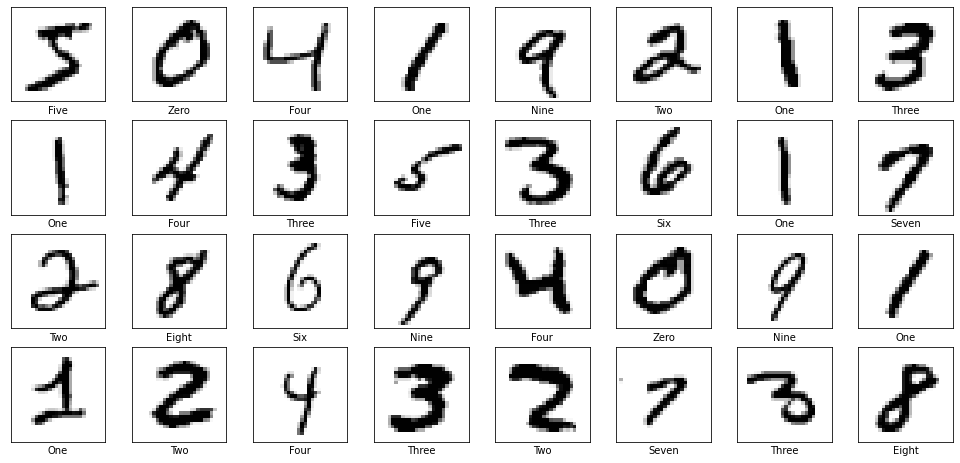

In [8]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### <font color='#34A853'>Build the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Setup and configure a Sequential model*</font>

<font size="3">**<span style="color:#4285F4">1<sup>st</sup></span> and <span style="color:#4285F4">2<sup>nd</sup></span> layers:**</font>
> <font size="3">**The recurrent neural network consists of a sequence of one <span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.LSTM</span> layer and one <span style="background-color: #ECECEC; color:#0047bb">tf.keras.layers.Dense</span> layer. These layers are densely connected or fully connected.**</font>

> <font size="3">**The 1<sup>st</sup> layer has 100 units.**</font>

> <font size="3">**The 2<sup>nd</sup> layer has 10 nodes (or neurons) which returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.**</font> 

In [9]:
model = Sequential()
model.add(LSTM(100, input_shape=(28,28)))
model.add(Dense(10, activation ='softmax'))

<font size="3">**Here's the complete architecture:**</font><br>

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               51600     
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
Total params: 52,610
Trainable params: 52,610
Non-trainable params: 0
_________________________________________________________________


### <font color='Orange'>*2) Compile the model*</font>

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

<font size="3">**<span style="color:#4285F4">SparseCategoricalCrossentropy</span> and <span style="color:#4285F4">CategoricalCrossentropy</span> both compute categorical cross-entropy. The only difference is in how the targets/labels should be encoded.**</font>

> <font size="3">**For <span style="color:#4285F4">one hot</span> representation, <span style="color:#4285F4">CatergoricalCrossentropy</span> can be used.**</font>

> <font size="3">**For labels as integers (i.e. 0, 1, 2), <span style="color:#4285F4">SparseCategoricalCrossentropy</span> can be used.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">from_logits</span> argument informs the loss function whether the output is expected to be a logits tensor (i.e. normalized).**</font>

><font size="3">**By default, <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">False </span> which assumes that output encodes a probability distribution, such as outputs from softmax and sigmoid activations.**</font>

><font size="3">**If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, this assumes that output is a logits. In this case, softmax or sigmoid activations will automatically applied on the output values by the loss function. Hence, output layer doesn't need any probabilistic activation function.**</font>

<font size="5"><span style="background-color:#EA4335; color:white">&nbsp;!&nbsp;</span></font> <font size="3">**Remark: If <span style="background-color: #ECECEC; color:#0047bb">from_logits</span> is <span style="color:#4285F4">True</span>, no activation function is needed in the output layer, e.g.**</font>

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/3NNExercise2.png?alt=media&token=d053ce8a-8ccb-4087-a198-a19ced62e298" width="2000"/>

### <font color='#34A853'>Train the model</font>
<hr style="border:2px solid ##34A853"> </hr>

### <font color='Orange'>*1) Feed the model*</font>

In [12]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3544 - accuracy: 0.8860 - val_loss: 0.1330 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1140 - accuracy: 0.9663 - val_loss: 0.0985 - val_accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0780 - accuracy: 0.9764 - val_loss: 0.0866 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0620 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0521 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0487 -

<font size="3">**To start training, <span style="background-color: #ECECEC; color:#0047bb">model.fit()</span> method can be used to "fit" the model with training data. In this example, the training data is in the <span style="color:#4285F4">train_images</span> and <span style="color:#4285F4">train_labels</span> arrays.**</font>

<font size="3">***Training accuracy***</font>
> <font size="3">**With slight modification from <span style="color:#4285F4">recurrent neural network</span> to <span style="color:#4285F4">LSTM</span>, as the model trains, the loss and accuracy metrics are improving. After 10 epochs, this model reaches an accuracy of about 0.99 (99%) on training data.**</font><br>

> <font size="3">**This improvement is mainly due to the fact that LSTM help avoid the vanishing gradient problems.**</font><br>

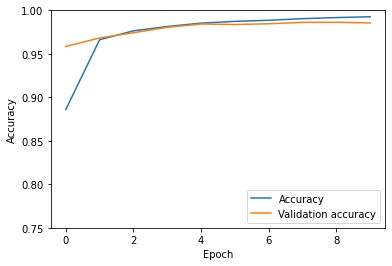

In [13]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 3s - loss: 0.0486 - accuracy: 0.9855
Test accuracy: 99 %


<font size="3">***Test accuracy***</font>
> <font size="3">**It turns out this LSTM has achieved a test accuracy of around 99%.**</font>

### <font color='Orange'>*3) Verify and visualize predictions*</font>

<font size="3">**With trained network, it can be used to make predictions.**</font>
<font size="3">**Let's predict 16 images. Correct prediction labels are blue and incorrect prediction labels are red. The number indicates the precentage (i.e. confidence) for the predicted label.**</font>

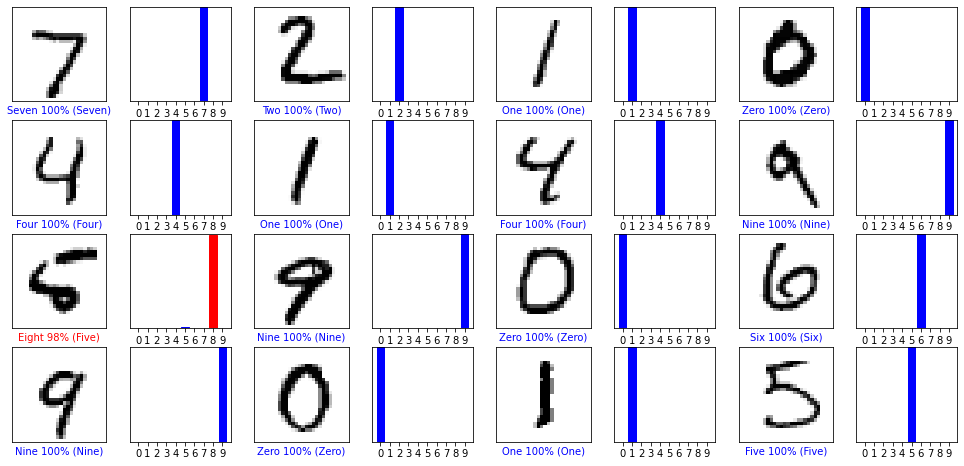

In [15]:
predictions = model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
    
plt.show()

### <font color='#34A853'>Use the trained model</font>
<hr style="border:2px solid ##34A853"> </hr>

<font size="3">**Once the model is trained, images can be fed into the model for prediction.**</font>

In [16]:
# Grab an image from the test dataset.
img = test_images[50]
print(img.shape)

(28, 28)


<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">tf.keras</span> models are optimized to make predictions on a <span style="color:#4285F4">batch</span>, or collection, of examples at once. Therefore, even this is a single image prediction, image needs to be add into a list and make it like a <span style="color:#4285F4">batch</span>.**</font>

<font size="3">**<span style="background-color: #ECECEC; color:#0047bb">np.expand_dims</span> function can help insert a new axis that will appear at the axis position in the expanded array shape.**</font>

In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


<font size="3">**Then, images can be fed into the model for prediction.**</font>

In [18]:
predictions_img = model.predict(img)

max_confidence = np.argmax(predictions_img[0])

print("The highest confidence is:", max_confidence)
print("The predicted class is:", class_names[max_confidence])

The highest confidence is: 6
The predicted class is: Six


<font size="3">**Let's visualize the results.**</font>

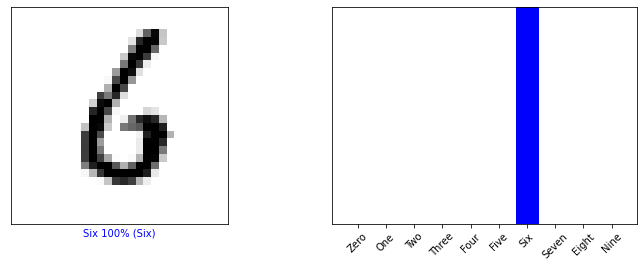

In [19]:
plt.figure(figsize=(12,4))

i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i]:
    color = 'blue'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                            100*np.max(predictions[i]),
                            class_names[test_labels[i]]),
                            color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=45)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="grey")
plt.ylim([0, 1])  

thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('blue')
    
plt.show()

<font size="3">**The model predicts the label correctly.**</font>

<hr style="border:2px solid ##34A853"> </hr>

##### This exercise is revised based on the TensorFlow tutorial (Reference: https://www.tensorflow.org/guide/keras/rnn).